Para entrar no modo apresentação, execute a seguinte célula e pressione `-`

In [1]:
%reload_ext slide

<IPython.core.display.Javascript object>

<span class="notebook-slide-start"/>

# Visualização Rica

Este notebook apresenta os seguintes tópicos

- [Visualizações ricas](#Visualiza%C3%A7%C3%B5es-ricas)
- [Exercício 12](#Exerc%C3%ADcio-12)
- [Exercício 13](#Exerc%C3%ADcio-13)


## Visualizações ricas

Como dito anteriormente, o Jupyter permite misturar texto formatado com código e com visualizações.

As visualizações até o momento foram feitas usando as bibliotecas `matplotlib` e `pandas` (que também utiliza a `matplotlib`), mas podemos chegar em situações em que queremos criar nossas próprias visualizações para objetos próprios.

Para fazer isso, podemos definir os métodos _repr_*_(self) em classes, on * pode ser algum dos seguintes formatos suportados pelo Jupyter:

- svg
- png
- jpeg
- html
- javascript
- latex


Por exemplo, podemos definir uma classe `SQRT` que represente uma raiz quadrada de um número usando Latex. <span class="notebook-slide-extra" data-count="1"/>

In [2]:
class SQRT:
    def __init__(self, number):
        self.number = number
    
    def formula(self):
        text = self.number
        if hasattr(self.number, "formula"):
            text = self.number.formula()
        return "\sqrt{%s}" % (text,)
    
    def _repr_latex_(self):
        return "$${}$$".format(self.formula())
    
SQRT(25)

Essa classe pode ser usada em conjunto com outra. <span class="notebook-slide-extra" data-count="1"/>

In [3]:
SQRT(SQRT(25))

Também podemos chamar programas externos para construir imagens. A seguir usaremos GraphViz (dot) para construir tanto uma imagem SVG quanto uma imagem PNG. <span class="notebook-slide-extra" data-count="2"/>

In [4]:
import os
from subprocess import Popen, PIPE as P

class Graph:
    def __init__(self, definition):
        self.definition = definition
    
    def dottext(self):
        result = [
            "  {} -> {};".format(node, other)
            for node, edges in self.definition.items()
            for other in edges
        ]
        return "digraph G {{\n  ranksep=0.25;\n{}\n}}".format("\n".join(result))

    def dot(self, format="png"):  # ToDo: Tratar erro
        kwargs = {} if os.name != 'nt' else {"creationflags": 0x08000000}
        p = Popen(['dot', '-T', format], stdout=P, stdin=P, stderr=P, **kwargs)
        return p.communicate(self.dottext().encode('utf-8'))[0]
    
    def __repr__(self):
        return self.dottext()
    
    def _repr_svg_(self):
        return self.dot("svg").decode("utf-8")
    
    def _repr_png_(self):
        return self.dot("png")
    
graph = Graph({"a": ["b", "c"], "b": ["d"], "c": ["d"]})

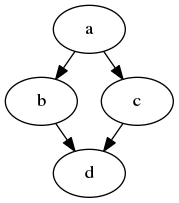

In [5]:
graph

Por padrão, objetos que oferecem tanto visualização png quanto svg são visualizados como SVG no Jupyter. Porém, podemos forçar que sejam visualizados como PNG. <span class="notebook-slide-extra" data-count="1"/>

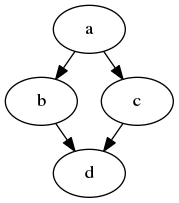

In [6]:
from IPython.display import display_png
display_png(graph)

Ou podemos forçar o uso do `__repr__` do Python.

In [8]:
from IPython.display import display_pretty
display_pretty(graph)

digraph G {
  ranksep=0.25;
  a -> b;
  a -> c;
  b -> d;
  c -> d;
}

Aproximando do assunto da apresentação, podemos usar esse grafo para exibir a AST. <span class="notebook-slide-extra" data-count="1"/>

In [9]:
import ast
from collections import defaultdict

class GraphVisitor(ast.NodeVisitor):
    
    def __init__(self):
        self.parent = []
        self.graph = defaultdict(list)
        self.id = 0
        
    def generic_visit(self, node):
        old_parent = self.parent
        name = type(node).__name__ + str(self.id)
        self.id += 1
        if old_parent:
            self.graph[old_parent].append(name)
        self.parent = name
        super().generic_visit(node)
        self.parent = old_parent


Executando para a própria célula. <span class="notebook-slide-extra" data-count="1"/>

In [12]:
tree = ast.parse(In[-1])
visitor = GraphVisitor()
visitor.visit(tree)

Visualização da AST. <span class="notebook-slide-extra" data-count="1"/>

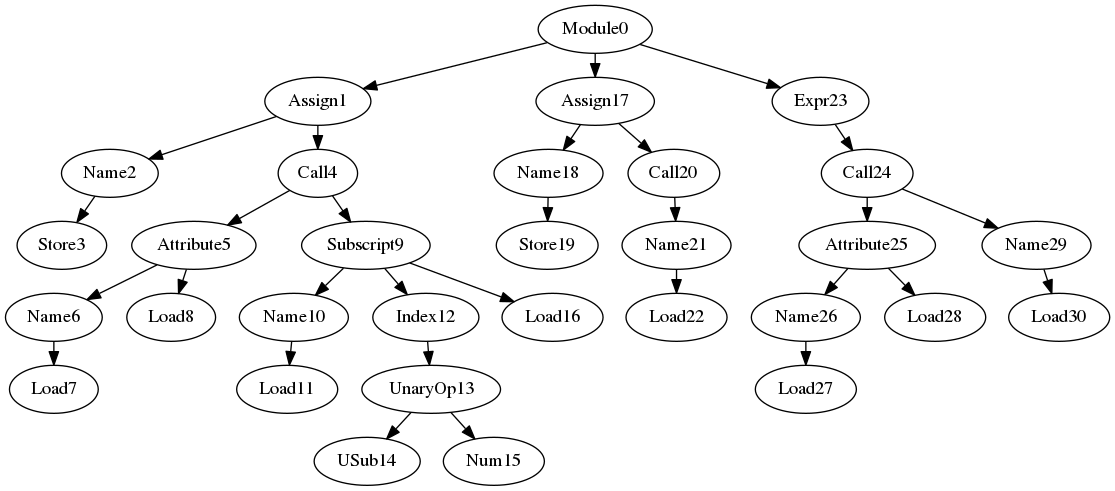

In [11]:
Graph(visitor.graph)

## Exercício 12

Modifique a classe `GraphVisitor` para exibir valores nos nós do tipo `Name` e `Num`. <span class="notebook-slide-extra" data-count="3"/>

In [15]:
import ast
from collections import defaultdict

class GraphVisitor(ast.NodeVisitor):
    
    def __init__(self):
        self.parent = []
        self.graph = defaultdict(list)
        self.id = 0
    
    def node_visit_name(self, name, node):
        old_parent = self.parent
        self.id += 1
        if old_parent:
            self.graph[old_parent].append(name)
        self.parent = name
        super().generic_visit(node)
        self.parent = old_parent

    def generic_visit(self, node):
        self.node_visit_name(type(node).__name__ + str(self.id), node)
        
    def visit_Name(self, node):
        self.node_visit_name(type(node).__name__ + "_" + node.id + "_"+ str(self.id), node)
        
    def visit_Num(self, node):
        self.node_visit_name(type(node).__name__ + "_" + str(node.n) + "_"+ str(self.id), node)
        
        

In [16]:
tree = ast.parse(In[-1])
visitor = GraphVisitor()
visitor.visit(tree)

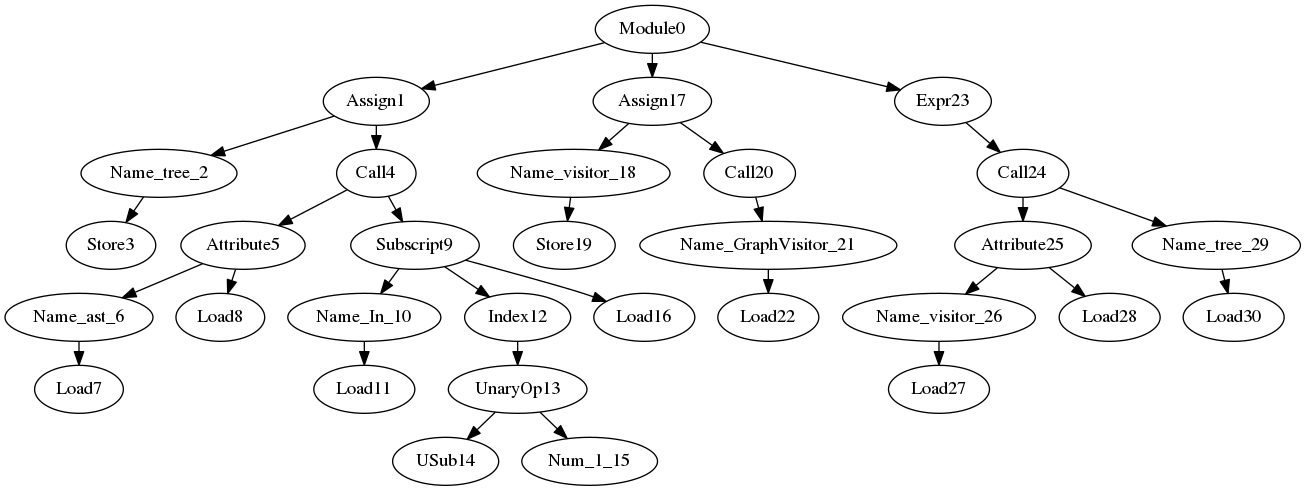

In [17]:
Graph(visitor.graph)

## Exercício 13

Implemente uma cell magic para visualizar a AST.

In [21]:
import ast
from IPython.core.magic import Magics, magics_class, cell_magic

@magics_class
class ASTMagic(Magics):
    @cell_magic
    def view_ast(self, line, cell):
        tree = ast.parse(cell)
        visitor = GraphVisitor()
        visitor.visit(tree)
        return Graph(visitor.graph)

shell = get_ipython()
shell.register_magics(ASTMagic)

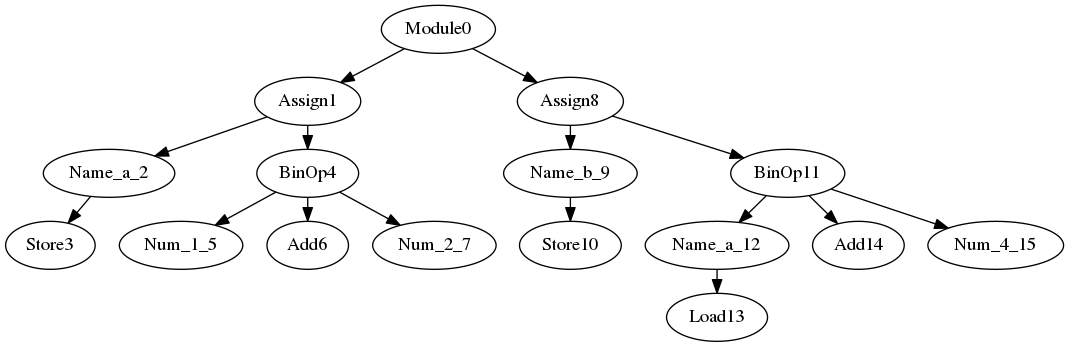

In [23]:
%%view_ast
a = 1 + 2
b = a + 4

Continua: [11.Widgets.ipynb](11.Widgets.ipynb)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


&nbsp;

&nbsp;

&nbsp;

